In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix , classification_report
import itertools
import os
import shutil
import matplotlib.pyplot as plt

In [3]:
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,validation_split=0.2)

train_batches = datagen.flow_from_directory(directory="veggie_heap_training",target_size=(256,256),classes=["Apatosaur Aphie's Apples",\
                                     "Bluplocephalus Bob's Blueberries","Cherizinoasaur Cher's Cherries","Corythosaurus Cory's Corn",\
                                     "Grapthorina Greta's Grapes","Pachycephalosaurus Perry's Peaches","Pepteranodon Pep's Peppers",\
                                     "Potoceratops Pott's Potatoes","Rhaspdodon Ribery's Raspberries","Stribecosaurus Stan's Strawberries",\
                                     "Thyreosaur Tim's Thyme","vacation_photos"],batch_size=40,subset='training')



Found 7872 images belonging to 12 classes.


In [4]:
validation_batches = datagen.flow_from_directory(directory="veggie_heap_training",target_size=(256,256),classes=["Apatosaur Aphie's Apples",\
                                     "Bluplocephalus Bob's Blueberries","Cherizinoasaur Cher's Cherries","Corythosaurus Cory's Corn",\
                                     "Grapthorina Greta's Grapes","Pachycephalosaurus Perry's Peaches","Pepteranodon Pep's Peppers",\
                                     "Potoceratops Pott's Potatoes","Rhaspdodon Ribery's Raspberries","Stribecosaurus Stan's Strawberries",\
                                     "Thyreosaur Tim's Thyme","vacation_photos"],batch_size=40,subset='validation')

Found 1963 images belonging to 12 classes.


In [5]:
test_batches = datagen.flow_from_directory(directory="veggie_heap_testing",target_size=(256,256),classes=["Apatosaur Aphie's Apples",\
                                     "Bluplocephalus Bob's Blueberries","Cherizinoasaur Cher's Cherries","Corythosaurus Cory's Corn",\
                                     "Grapthorina Greta's Grapes","Pachycephalosaurus Perry's Peaches","Pepteranodon Pep's Peppers",\
                                     "Potoceratops Pott's Potatoes","Rhaspdodon Ribery's Raspberries","Stribecosaurus Stan's Strawberries"\
                                     ,"Thyreosaur Tim's Thyme","vacation_photos"],batch_size=40)

Found 2424 images belonging to 12 classes.


In [6]:
images,labels = train_batches.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

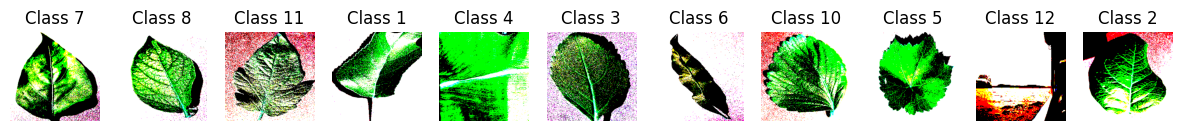

In [7]:
class_indices = np.argmax(labels, axis=1)

# Dictionary to store one image per class
class_images = {}

# Iterate through the batch and store one image per class
for i in range(len(class_indices)):
    class_index = class_indices[i]
    if class_index not in class_images:
        class_images[class_index] = images[i]


# Plot one image per class
num_classes = len(class_images)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 10))

for i, (class_index, image) in enumerate(class_images.items()):
    axes[i].imshow(image)
    axes[i].set_title(f"Class {class_index+1}")
    axes[i].axis('off')

plt.show()


In [60]:
CNN_Model = models.Sequential([
   # cnn
    layers.Conv2D(filters = 128, activation = 'relu',padding = 'same', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation = 'relu',padding = 'same', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation = 'relu',padding = 'same', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation = 'relu',padding = 'same', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(units = 100,activation = 'relu'),
    layers.Dense(units = 12, activation = 'softmax'),
])


In [61]:
CNN_Model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 128, 128, 128)     0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 64, 64, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 32, 32, 128)      

In [62]:
CNN_Model.compile(optimizer=Adam(learning_rate=0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [65]:
CNN_Model.fit(x=train_batches,validation_data = validation_batches,epochs=5,verbose=2)

Epoch 1/5
263/263 - 1001s - loss: 0.1919 - accuracy: 0.9374 - val_loss: 0.4283 - val_accuracy: 0.8956 - 1001s/epoch - 4s/step
Epoch 2/5
263/263 - 918s - loss: 0.1667 - accuracy: 0.9465 - val_loss: 0.2855 - val_accuracy: 0.9277 - 918s/epoch - 3s/step
Epoch 3/5
263/263 - 906s - loss: 0.1151 - accuracy: 0.9637 - val_loss: 0.3193 - val_accuracy: 0.9424 - 906s/epoch - 3s/step
Epoch 4/5
263/263 - 916s - loss: 0.1275 - accuracy: 0.9596 - val_loss: 0.3859 - val_accuracy: 0.9226 - 916s/epoch - 3s/step
Epoch 5/5
263/263 - 943s - loss: 0.1256 - accuracy: 0.9605 - val_loss: 0.2938 - val_accuracy: 0.9328 - 943s/epoch - 4s/step


In [66]:
test_images,test_labels = next(test_batches)
predictions = CNN_Model.predict(x=test_images,verbose=2)
loss, accuracy = CNN_Model.evaluate(test_batches)


2/2 - 2s - 2s/epoch - 803ms/step
49/49 [==============================] - 64s 1s/step - loss: 2.0103 - accuracy: 0.6757


In [67]:
predictions = np.round(predictions)
y_pred = np.argmax(predictions,axis=1)
y_true = np.argmax(test_labels,axis=1)
Labels = ["Apatosaur Aphie's Apples","Bluplocephalus Bob's Blueberries","Cherizinoasaur Cher's Cherries","Corythosaurus Cory's Corn",\
                                    "Grapthorina Greta's Grapes","Pachycephalosaurus Perry's Peaches","Pepteranodon Pep's Peppers",\
                                    "Potoceratops Pott's Potatoes","Rhaspdodon Ribery's Raspberries","Stribecosaurus Stan's Strawberries",\
                                    "Thyreosaur Tim's Thyme","vacation_photos"]

/home/mrigaank17/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mrigaank17/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mrigaank17/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


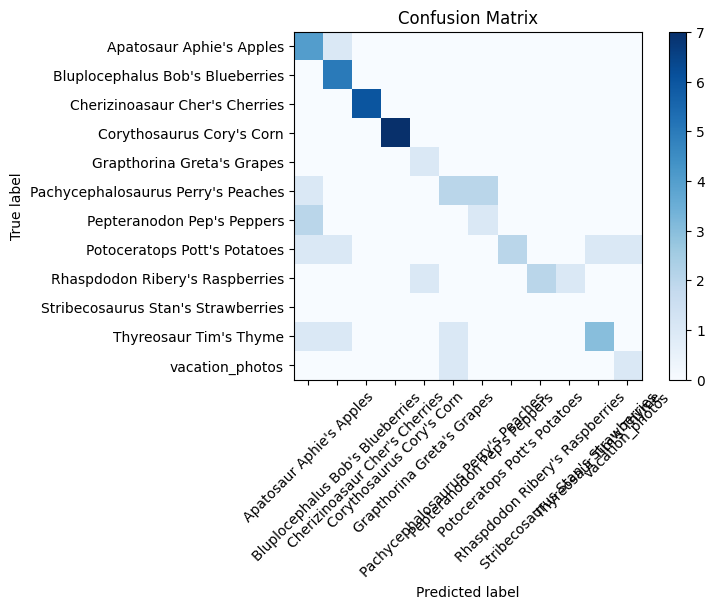


Classification Report:
                                    precision    recall  f1-score   support

          Apatosaur Aphie's Apples       0.44      0.80      0.57         5
  Bluplocephalus Bob's Blueberries       0.62      1.00      0.77         5
    Cherizinoasaur Cher's Cherries       1.00      1.00      1.00         6
         Corythosaurus Cory's Corn       1.00      1.00      1.00         7
        Grapthorina Greta's Grapes       0.50      1.00      0.67         1
Pachycephalosaurus Perry's Peaches       0.50      0.40      0.44         5
        Pepteranodon Pep's Peppers       0.33      0.33      0.33         3
      Potoceratops Pott's Potatoes       1.00      0.33      0.50         6
   Rhaspdodon Ribery's Raspberries       1.00      0.50      0.67         4
Stribecosaurus Stan's Strawberries       0.00      0.00      0.00         0
            Thyreosaur Tim's Thyme       0.75      0.50      0.60         6
                   vacation_photos       0.50      0.50      0.

In [75]:
cm = confusion_matrix(y_true,y_pred)
class_report = classification_report(y_true, y_pred, target_names=Labels)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(Labels))
plt.xticks(tick_marks, Labels, rotation=45)
plt.yticks(tick_marks, Labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("\nClassification Report:")
print(class_report)
print(f"\nLoss = {loss}")
print(f"\nAccuracy = {accuracy*100}%")